In [166]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('universal_studio_branches.csv')

In [3]:
df.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [4]:
df.shape

(50904, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50904 entries, 0 to 50903
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviewer      50904 non-null  object 
 1   rating        50904 non-null  float64
 2   written_date  50904 non-null  object 
 3   title         50904 non-null  object 
 4   review_text   50904 non-null  object 
 5   branch        50904 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [6]:
df.tail()

,reviewer,rating,written_date,title,review_text,branch
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore
50903,sc_myinitial,5.0,"February 24, 2010",Excellent Sneak Preview,My group managed to get the tickets for the 16...,Universal Studios Singapore


In [7]:
df['branch'].value_counts()

Universal Studios Florida      30621
Universal Studios Singapore    15754
Universal Studios Japan         4529
Name: branch, dtype: int64

In [8]:
df['rating'].value_counts()

5.0    28202
4.0    13514
3.0     5229
2.0     1986
1.0     1973
Name: rating, dtype: int64

In [9]:
df.columns

Index(['reviewer', 'rating', 'written_date', 'title', 'review_text', 'branch'], dtype='object')

In [10]:
df['target'] = df.rating.apply(lambda x: 1 if x>=4.0 else 0)

In [11]:
df.head()

,reviewer,rating,written_date,title,review_text,branch,target
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,0
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,0
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,1
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1


In [12]:
df = df[['rating','title','review_text', 'branch','target']]

In [13]:
df.head()

,rating,title,review_text,branch,target
0,2.0,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,0
1,1.0,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,0
2,2.0,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0
3,4.0,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,1
4,5.0,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1


# GENERAL FEATURES AND PREPROCESSING

In this section,I will be extracting all the MAUAL FEATURES which will be useful in understanding the data and  PREPROCESSING AND CLEANING the data.
The steps will be

    GENERAL FEATURE EXTRACTION:
        1. WORD COUNTS
        2. CHARACTER COUNTS
        3. STOPWORDS COUNT
        4. HASTAGS(#) AND MENTION (@) COUNTS
        5. IF NUMERIC DIGITS ARE PRESENT
        6. UPPER CASE WORD COUNTS
            
    PREPROCESSING AND CLEANING:
        1. CONVERSION OF UPPER CASE TO LOWER CASE
        2. CONTRACTION TO EXPANSION
        3. EMAILS COUNT AND REMOVAL
        4. REMOVAL OF SPECIAL CHARACTERS
        5. REMOVAL OF HTML TAGS
        6. REMOVAL OF ACCENTED CHARS
        7. REMOVAL OF MULTIPLE SPACES
        8. REMOVAL OF COMMON OCCURING AND RARE OCCURING WORDS

In [14]:
df['wordcounts'] = df['title'].apply(lambda x: len(str(x).split()))
df['wordcounts_reviewtext'] = df['review_text'].apply(lambda x: len(str(x).split()))

In [15]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext
0,2.0,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,0,9,255
1,1.0,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,0,5,35
2,2.0,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0,1,228
3,4.0,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,1,2,55
4,5.0,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1,4,94


In [16]:
df['charactercounts'] = df['title'].apply(lambda x: len(x))
df['charactercounts_reviewtext'] = df['review_text'].apply(lambda x: len(x))

In [17]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext
0,2.0,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,0,9,255,53,1354
1,1.0,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,0,5,35,20,201
2,2.0,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0,1,228,12,1274
3,4.0,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286
4,5.0,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1,4,94,33,502


In [18]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [19]:
df['average_wordlength'] = df['review_text'].apply(lambda x: get_avg_word_len(x))

In [20]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength
0,2.0,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039
1,1.0,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,0,5,35,20,201,4.771429
2,2.0,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105
3,4.0,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182
4,5.0,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1,4,94,33,502,4.351064


In [21]:
print(STOP_WORDS)

{'somehow', 'did', 'seeming', 'but', 'that', 'already', 'hundred', 'move', 'nobody', 'when', 'of', 'towards', 'give', 'down', '‘ll', 'ever', 'least', 'whether', 'up', 'anything', 'than', 'whenever', 'whither', 'had', 'most', 'make', 'namely', 'else', 'not', 'thereupon', 'ourselves', 'so', "'ve", 'an', 'hereupon', 'moreover', 'yourself', 'the', 'nothing', 'if', 'does', 'or', 'sometimes', 'wherever', 'together', 'four', 'being', 'upon', 'all', 'yourselves', 'although', 'beside', 'then', 'whence', 'thereafter', 'whereby', 'between', 'former', 'forty', 'has', 'wherein', 'ours', 'perhaps', 'done', 'various', 'about', 'out', 'until', 'among', 'do', 'back', 'beyond', 'via', 'beforehand', 'third', 'where', 'his', 'with', 'first', 'could', '’s', 'someone', 'within', 'am', 'she', 'anyhow', 'whom', 'fifty', 'latterly', 'we', 'while', 'along', 'noone', 'hereafter', 'one', 'only', 'five', 'and', 'into', 'himself', '’re', 'seem', 'everything', 'twenty', 'whoever', 'my', 'cannot', 'can', 'also', 'hen

In [22]:
df['Stopwords'] = df['review_text'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [23]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords
0,2.0,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117
1,1.0,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,0,5,35,20,201,4.771429,13
2,2.0,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103
3,4.0,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30
4,5.0,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1,4,94,33,502,4.351064,45


In [24]:
df['hastagscounts'] = df['review_text'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions'] = df['review_text'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [25]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions
0,2.0,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0
1,1.0,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0
2,2.0,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0
3,4.0,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0


In [26]:
df.tail()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions
50899,4.0,I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,1,6,359,24,2021,4.607242,134,0,1
50900,4.0,Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore,1,4,402,38,2423,4.992537,150,0,0
50901,4.0,Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore,1,5,182,34,935,4.142857,88,0,0
50902,4.0,Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,1,4,231,28,1279,4.541126,105,0,0
50903,5.0,Excellent Sneak Preview,My group managed to get the tickets for the 16...,Universal Studios Singapore,1,3,434,23,2386,4.474654,178,0,0


In [27]:
df['numericcounts'] = df['review_text'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [28]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts
0,2.0,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1
1,1.0,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2
2,2.0,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2
3,4.0,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0


In [29]:
df['uppercount'] = df['review_text'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [30]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount
0,2.0,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2
1,1.0,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0
2,2.0,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6
3,4.0,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9


In [31]:
df['review_text'] = df['review_text'].apply(lambda x: x.lower())

In [32]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount
0,2.0,Universal is a complete Disaster - stick with ...,we went to universal over memorial day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2
1,1.0,Food is hard to get.,the food service is horrible. i’m not reviewin...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0
2,2.0,Disappointed,i booked this vacation mainly to ride hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6
3,4.0,My opinion,when a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"ok, i can't stress enough to anyone and everyo...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9


In [33]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [34]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [35]:
%%time
df['review_text'] = df['review_text'].apply(lambda x:cont_to_exp(x))

Wall time: 5.37 s


In [36]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount
0,2.0,Universal is a complete Disaster - stick with ...,we went to universal over memorial day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2
1,1.0,Food is hard to get.,the food service is horrible. i’m not reviewin...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0
2,2.0,Disappointed,i booked this vacation mainly to ride hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6
3,4.0,My opinion,when a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"ok, i cannot stress enough to anyone and every...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9


In [37]:
df['mentions']

0        0
1        0
2        0
3        0
4        0
        ..
50899    1
50900    0
50901    0
50902    0
50903    0
Name: mentions, Length: 50904, dtype: int64

In [38]:
df['hastagscounts']

0        0
1        0
2        0
3        0
4        0
        ..
50899    0
50900    0
50901    0
50902    0
50903    0
Name: hastagscounts, Length: 50904, dtype: int64

In [39]:
import re

In [40]:
df['emails'] = df['review_text'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x))

In [41]:
df['emails_count'] = df['emails'].apply(lambda x:len(x))

In [42]:
df[df['emails_count']>0]

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count
5683,1.0,Universal Studios park is awful !,my family purchased a 3 park 3 day pass at uni...,Universal Studios Florida,0,6,463,33,2528,4.455724,194,0,0,9,9,[stevejonesmns@gmail.com],1
28370,1.0,"Halloween Horror Nights 2012 Oct.20,2012",the real horror of halloween horror nights at ...,Universal Studios Florida,0,5,159,40,894,4.628931,74,0,0,4,3,[danrosebaugh@yahoo.com],1
30460,5.0,It Trumped Disney in My Book!,well...i did a lot of research and boy did it ...,Universal Studios Florida,1,6,527,29,2779,4.275142,229,0,0,5,24,[aaliciaben8@aol.com],1
32121,5.0,It just got better...,my now 17yr old son and 15yr old daughter came...,Universal Studios Japan,1,4,800,21,4288,4.336250,354,0,0,12,10,[mattalansharp@gmail.com],1
34066,5.0,OMG. OMG. OMG ☺️,my email is mattalansharp@gmail.com if you wan...,Universal Studios Japan,1,4,795,16,4232,4.295597,349,0,0,13,33,[mattalansharp@gmail.com],1
35577,3.0,Expensive and Moderate Experience,i visited the universal studios singapore in j...,Universal Studios Singapore,0,4,121,33,670,4.545455,59,0,0,0,1,[harshdabas1@gmail.com],1
37647,5.0,"A Universe of Fun, Food and Entertainment!","next day, it was time for a daylong fun and en...",Universal Studios Singapore,1,7,713,42,4369,5.119215,301,0,0,0,8,[anilbisht@rediffmail.com],1
37716,1.0,Terrible place to go,"as many people, i was excited and look forward...",Universal Studios Singapore,0,4,363,20,1858,4.121212,189,0,0,5,13,[lexubin777@yahoo.com],1
49109,5.0,Excellent place for fun!,"we have visited there on last week of january,...",Universal Studios Singapore,1,4,288,24,1492,4.177083,123,0,0,5,11,[aurthohin2000@yahoo.com],1


In [43]:
df['review_text'] = df['review_text'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))

In [44]:
df[df['emails_count']>0]

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count
5683,1.0,Universal Studios park is awful !,my family purchased a 3 park 3 day pass at uni...,Universal Studios Florida,0,6,463,33,2528,4.455724,194,0,0,9,9,[stevejonesmns@gmail.com],1
28370,1.0,"Halloween Horror Nights 2012 Oct.20,2012",the real horror of halloween horror nights at ...,Universal Studios Florida,0,5,159,40,894,4.628931,74,0,0,4,3,[danrosebaugh@yahoo.com],1
30460,5.0,It Trumped Disney in My Book!,well...i did a lot of research and boy did it ...,Universal Studios Florida,1,6,527,29,2779,4.275142,229,0,0,5,24,[aaliciaben8@aol.com],1
32121,5.0,It just got better...,my now 17yr old son and 15yr old daughter came...,Universal Studios Japan,1,4,800,21,4288,4.336250,354,0,0,12,10,[mattalansharp@gmail.com],1
34066,5.0,OMG. OMG. OMG ☺️,my email is if you want help. this is a long...,Universal Studios Japan,1,4,795,16,4232,4.295597,349,0,0,13,33,[mattalansharp@gmail.com],1
35577,3.0,Expensive and Moderate Experience,i visited the universal studios singapore in j...,Universal Studios Singapore,0,4,121,33,670,4.545455,59,0,0,0,1,[harshdabas1@gmail.com],1
37647,5.0,"A Universe of Fun, Food and Entertainment!","next day, it was time for a daylong fun and en...",Universal Studios Singapore,1,7,713,42,4369,5.119215,301,0,0,0,8,[anilbisht@rediffmail.com],1
37716,1.0,Terrible place to go,"as many people, i was excited and look forward...",Universal Studios Singapore,0,4,363,20,1858,4.121212,189,0,0,5,13,[lexubin777@yahoo.com],1
49109,5.0,Excellent place for fun!,"we have visited there on last week of january,...",Universal Studios Singapore,1,4,288,24,1492,4.177083,123,0,0,5,11,[aurthohin2000@yahoo.com],1


In [45]:
df['urls_count'] = df['review_text'].apply(lambda x: len(re.findall(r'((http|ftp|https):\/\/)?([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])?',x))) 

In [46]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,we went to universal over memorial day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,the food service is horrible. i’m not reviewin...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,i booked this vacation mainly to ride hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,when a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"ok, i cannot stress enough to anyone and every...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


In [47]:
df['urls_count']

0        0
1        0
2        0
3        0
4        0
        ..
50899    3
50900    1
50901    0
50902    0
50903    0
Name: urls_count, Length: 50904, dtype: int64

In [48]:
df['review_text'] = df['review_text'].apply(lambda x:re.sub(r'((http|ftp|https):\/\/)?([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])?', '',x))

In [49]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,we went to universal over memorial day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,the food service is horrible. i’m not reviewin...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,i booked this vacation mainly to ride hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,when a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"ok, i cannot stress enough to anyone and every...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


In [50]:
df.loc[50899]['review_text']

'this is my first visit to a universal studio theme park  i went to the park on a friday morning during the soft launch.  general info and ticketing were available on-line for your convenience. i booked my tickets on line but called the help desk for general assistance first. help desk was promptly answered and friendly. an email was send to me which allowed me to print the tickets @ home.  i arrived at the park at . there were short queues. all you need to do is to scan the bar code on your ticket to gain access into the park.. surprisingly, there was no security inspection at all. for the soft launch, we were given s$10 meal voucher and a $5 retail voucher.  we found the park staff to be extremely friendly and informative - with their greetings, striking up conversation, offering tips on watching shows and helping you take photos.  rides the biggest disappointment was the closure of battlestar galactica when we were there due to a technical glitch. perhaps, the park could consider so

In [51]:
df['review_text'] = df['review_text'].apply(lambda x: re.sub('RT',"",x))

In [52]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,we went to universal over memorial day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,the food service is horrible. i’m not reviewin...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,i booked this vacation mainly to ride hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,when a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"ok, i cannot stress enough to anyone and every...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


In [53]:
df['review_text'] = df['review_text'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '',x))

In [54]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,we went to universal over memorial day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,the food service is horrible im not reviewing ...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,i booked this vacation mainly to ride hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,when a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,ok i cannot stress enough to anyone and everyo...,Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


In [55]:
df.loc[50899]['review_text']

'this is my first visit to a universal studio theme park  i went to the park on a friday morning during the soft launch  general info and ticketing were available on-line for your convenience i booked my tickets on line but called the help desk for general assistance first help desk was promptly answered and friendly an email was send to me which allowed me to print the tickets  home  i arrived at the park at  there were short queues all you need to do is to scan the bar code on your ticket to gain access into the park surprisingly there was no security inspection at all for the soft launch we were given s10 meal voucher and a 5 retail voucher  we found the park staff to be extremely friendly and informative - with their greetings striking up conversation offering tips on watching shows and helping you take photos  rides the biggest disappointment was the closure of battlestar galactica when we were there due to a technical glitch perhaps the park could consider some ex gratia compensa

In [56]:
df['review_text'] = df['review_text'].apply(lambda x: " ".join(x.split()))

In [57]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,we went to universal over memorial day weekend...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,the food service is horrible im not reviewing ...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,i booked this vacation mainly to ride hagrid m...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,when a person tries the test seat for the ride...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,ok i cannot stress enough to anyone and everyo...,Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


In [58]:
from bs4 import BeautifulSoup

In [59]:
%%time
df['review_text'] = df['review_text'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())

Wall time: 19.3 s


In [60]:
import unicodedata

In [61]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD',x).encode('ascii', 'ignore').decode('utf-8','ignore')
    return x

In [62]:
%%time
df['review_text'] = df['review_text'].apply(lambda x:remove_accented_chars(x))

Wall time: 388 ms


In [63]:
df['review_text'] = df['review_text'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [64]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,went universal memorial day weekend total trai...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,food service horrible im reviewing food wait t...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,booked vacation mainly ride hagrid motorcycle ...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,person tries test seat rides gets green light ...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,ok stress universal studios orlando sure time ...,Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


In [65]:
df.loc[0]['review_text']

'went universal memorial day weekend total train wreck waited parking lot minutes paid prime parking wasted time paid extra express pass 2-park tickets turned away sent guest services bc app didnt bar code line guest services took forever clearly understaffed sent guest services line express passes took ages spent nearly 2 hours trying enter park shared jackie guest services smirked didnt apologize patronizing happen disney inside rides didnt work reopened backed express line rides hour wait hours express pass saw people jump sneak express lanes convince workers let check point worked felt like complete suckers paying express pass left long lines people didnt pay sneak long lines buy water use restroom butter beer- sucked horrible day avoid place total disaster'

In [66]:
#'some', 'quite', 'a', 'anything', 'for', 'be', 'none', 'from', 'others', '‘re', 'one', 'around', 'our', 'same', 'mine', 'somewhere', 'has', 'does', 'every', 'less', 'eight', 'above', 'own', 'two', 'another', 'were', 'namely', 'its', 'keep', 'very', 'behind', 'eleven', 'had', 'regarding', 'indeed', 'few', 'more', 'myself', 'unless', 'their', '‘d', 'everyone', 'bottom', 'thru', "n't", 'put', 'amount', 'my', 'over', 'various', 'n‘t', 'am', 'such', 'up', 'everywhere', 'there', 'towards', '’s', 'nine', 'together', 'not', 'show', 'n’t', 'someone', 'here', 'never', 'to', 'yourselves', 'so', 'hereafter', 'him', 'thereby', 'alone', 'whom', 'therefore', 'an', 'already', 'due', 'whether', 'under', 'who', 'but', 'four', 'name', 'whence', 'she', 'themselves', '‘s', 'either', 'six', 'we', 'can', 'whereas', 'anyway', 'it', 'on', 'neither', 'get', 'wherever', '’d', 'been', 'into', 'latter', '‘ve', 'only', 'wherein', 'did', 'formerly', 'least', 'perhaps', 'say', 'beyond', 're', 'moreover', 'those', "'s", '’ve', 'will', 'me', 'because', 'whole', 'other', '’m', 'several', 'what', 'really', 'nothing', 'yours', 'used', 'while', 'that', 'therein', 'why', 'before', 'three', 'whereafter', 'yet', 'meanwhile', 'ca', 'how', '‘ll', 'using', "'m", "'ve", 'nobody', 'front', 'most', 'give', 'even', 'thereafter', 'else', 'mostly', 'nevertheless', 'of', 'former', 'is', 'beforehand', 'third', 'seem', 'whereupon', 'always', 'side', 'within', 'twelve', 'part', 'at', 'see', 'he', 'call', 'hereupon', 'also', 'per', 'are', 'must', 'besides', 'about', 'with', 'during', '‘m', 'noone', 'although', 'nor', 'would', 'the', 'you', 'thence', 'otherwise', 'ours', 'afterwards', 'elsewhere', 'go', 'down', 'five', 'hereby', 'whose', 'empty', 'thus', 'forty', 'ourselves', 'latterly', 'seemed', 'i', 'twenty', 'though', 'anyhow', 'just', 'anywhere', 'too', "'d", 'anyone', 'make', 'full', 'hence', 'ten', 'somehow', 'which', 'your', 'herein', 'top', 'move', 'everything', 'via', 'nowhere', 'cannot', 'out', 'as', 'next', 'further', 'itself', 'could', 'amongst', 'becomes', 'being', 'by', 'hers', 'upon', 'her', 'them', 'hundred', 'or', 'please', 'again', 'after', 'done', 'made', 'where', 'and', 'in', 'between', 'all', 'seeming', 'no', 'off', 'should', 'each', 'last', 'was', 'well', 'then', 'throughout', 'this', 'back', 'whoever', 'when', 'beside', 'us', 'among', 'whereby', "'ll", 'whither', 'thereupon', 'along', 'enough', 'ever', 'still', 'now', 'fifty', 'whatever', 'since', '’re', 'rather', 'his', 'take', 'however', 'do', 'except', 'onto', 'these', 'they', 'almost', 'sometimes', 'yourself', 'become', 'than', 'without', 'became', 'sixty', 'toward', 'serious', '’ll', 'himself', 'many', 'against', 'may', 'if', 'until', 'might', 'sometime', 'whenever', 'often', 'seems', 'fifteen', 'herself', 'across', 'once', "'re", 'doing', 'first', 'below', 'something', 'have', 'any', 'much', 'both', 'becoming', 'through'

In [67]:
df

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,went universal memorial day weekend total trai...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,food service horrible im reviewing food wait t...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,booked vacation mainly ride hagrid motorcycle ...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,person tries test seat rides gets green light ...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,ok stress universal studios orlando sure time ...,Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50899,4.0,I'll Be Back Only If ...,visit universal studio theme park went park fr...,Universal Studios Singapore,1,6,359,24,2021,4.607242,134,0,1,2,8,[],0,3
50900,4.0,Universal Studios Singapore Experience,finally visited singapores theme park -univers...,Universal Studios Singapore,1,4,402,38,2423,4.992537,150,0,0,3,17,[],0,1
50901,4.0,Impressive but not quite finished!,visited week soft opening unfortunately dual r...,Universal Studios Singapore,1,5,182,34,935,4.142857,88,0,0,4,4,[],0,0
50902,4.0,Small but beautifully marked,visited 3rd day soft opening ticket sales limi...,Universal Studios Singapore,1,4,231,28,1279,4.541126,105,0,0,2,1,[],0,0


In [68]:
text = ' '.join(df['review_text'])
len(text)

17722510

In [69]:
text = ' '.join(df['review_text'])

In [70]:
text = text.split()

In [71]:
freq_common = pd.Series(text).value_counts()
f20= freq_common[:20]

In [72]:
f20

rides        50825
park         49752
ride         48036
universal    35442
day          32496
time         30144
great        22213
harry        20010
potter       19609
pass         19343
express      19334
fun          16081
good         16021
-            15654
wait         15398
like         14914
studios      14897
went         13598
parks        13543
food         12614
dtype: int64

In [73]:
df['review_text'] = df['review_text'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [74]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,memorial weekend total train wreck waited park...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,service horrible im reviewing 45 minutes minim...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,booked vacation mainly hagrid motorcycle adven...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,person tries test seat gets green light long l...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,ok stress orlando sure bourne stuntaculari wat...,Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


In [75]:
text = ' '.join(df['review_text'])
len(text)

14992717

In [76]:
rare20 = freq_common[-20:]

In [77]:
rare20

litlle             1
disclaim           1
stand-still        1
jun-14             1
agessizes          1
tackier            1
madeye             1
wellback           1
peut-tre           1
distinctively      1
brushstrokes       1
barcelona          1
20-hour            1
ghostship          1
umbrellarain       1
super-loud         1
ktm                1
adrealine          1
konfrontation      1
changeing-table    1
dtype: int64

In [78]:
rare = freq_common[freq_common.values == 1]

In [79]:
rare


b2                 1
fxs                1
darly              1
non-electric       1
napsack            1
                  ..
super-loud         1
ktm                1
adrealine          1
konfrontation      1
changeing-table    1
Length: 33786, dtype: int64

In [80]:
df['review_text'] = df['review_text'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare]))

In [81]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,memorial weekend total train wreck waited park...,Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,service horrible im reviewing 45 minutes minim...,Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,booked vacation mainly hagrid motorcycle adven...,Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,person tries test seat gets green light long l...,Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,ok stress orlando sure bourne watch 3xs knew j...,Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


In [82]:
text = ' '.join(df['review_text'])
len(text)

14661963

In [83]:
17722510 - 14661963

3060547

# VISUALIZING WORDCLOUD

We will be visualizing the Positive and Negative feedbacks that people have given in the rating. For this we can use WORDCLOUD for visualizing and understanding the behavioiur of visitors.
The below code is importing the WORDCLOUD and matplotlib library,In this we will define separately the positive and negative feedbacks and also we will be importing the stopwords by using nltk(which is natural language processing tool kit)

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

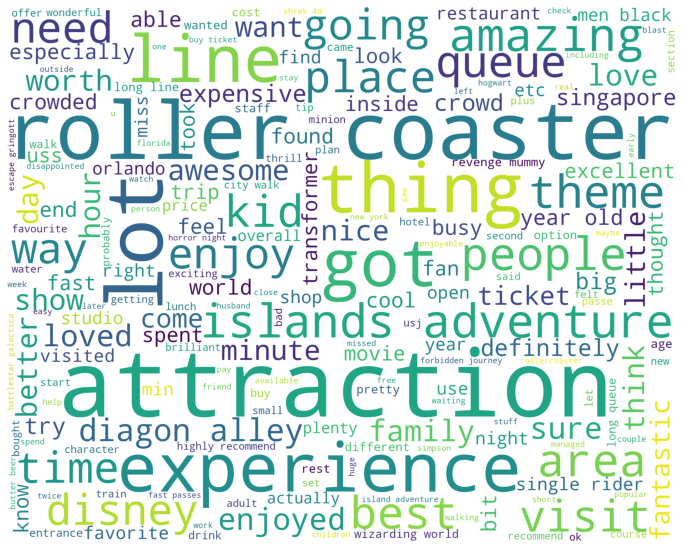

In [85]:
from nltk.corpus import stopwords
df_positive = df[df['target']==1]['review_text']

wordcloud1 = WordCloud(
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_positive))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

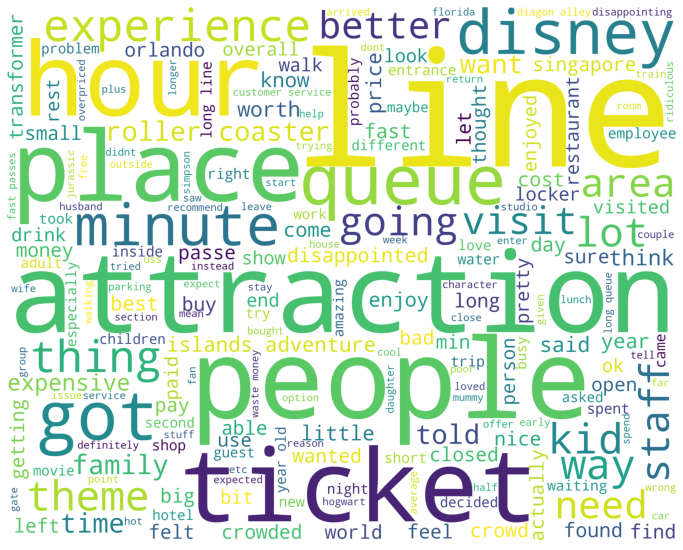

In [86]:
df_negative = df[df['target']==0]['review_text']

wordcloud1 = WordCloud(
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_negative))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

# TOKENIZATION

Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.Tokenization is the first step in the process of text preprocessing steps.It helps us to build the tokens(which is separating the words from the sentences),so that it will be easy to do the machine learning techniques.
By using nltk library we can easily tokenize the sentences and words.

In [87]:
import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

df['review_text'] = df['review_text'].apply(lambda x: tokenize(x.lower()))

df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,"[memorial, weekend, total, train, wreck, waite...",Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,"[service, horrible, im, reviewing, 45, minutes...",Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,"[booked, vacation, mainly, hagrid, motorcycle,...",Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,"[person, tries, test, seat, gets, green, light...",Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"[ok, stress, orlando, sure, bourne, watch, 3xs...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


# STOPWORDS REMOVAL

Removing stopwords is the important part of any nltk project,because there might be number of words which need to be processed and removed from the data.This can also be done with the help of nltk by incorporating "stopwords"

In [88]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [89]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

df['review_text'] = df['review_text'].apply(lambda x: remove_stopwords(x))

df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,"[memorial, weekend, total, train, wreck, waite...",Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,"[service, horrible, im, reviewing, 45, minutes...",Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,"[booked, vacation, mainly, hagrid, motorcycle,...",Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,"[person, tries, test, seat, gets, green, light...",Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"[ok, stress, orlando, sure, bourne, watch, 3xs...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


# STEMMING

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).In this we will be using PORTERSTEMMER,say in simple words stemming can be understood in below steps
1)run
2)running
3)ran
4)runs
So when stemming is incorporated all these words will be changed to same form(i.e 'run')

In [90]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [91]:
def stemming(tokenized_text):
    
    text = [ps.stem (word) for word in tokenized_text]
     
    return text

df['review_text'] = df['review_text'].apply(lambda x: stemming(x))

df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,"[memori, weekend, total, train, wreck, wait, p...",Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,"[servic, horribl, im, review, 45, minut, minim...",Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,"[book, vacat, mainli, hagrid, motorcycl, adven...",Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,"[person, tri, test, seat, get, green, light, l...",Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"[ok, stress, orlando, sure, bourn, watch, 3x, ...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


# FEATURE EXTRACTION(BAG OF WORDS)

In this section of preprocessing we will pass the last commands befor extracting the bag of words for feature extraction.
In this part we will join the text in data,because the tokens in data set is separated by commas.
We need to remove those commas from tokens,so that there won't be any error while executing Countvectorizer.

In [92]:
import string

In [93]:
def clean_text(txt):
    txt = ''.join([c for c in txt if c is not string.punctuation])
    tokens = re.split('\W+', txt)
    text = [ps.stem (word) for word in tokens if word not in stopwords]
    return txt

In [94]:
df.head()

,rating,title,review_text,branch,target,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails,emails_count,urls_count
0,2.0,Universal is a complete Disaster - stick with ...,"[memori, weekend, total, train, wreck, wait, p...",Universal Studios Florida,0,9,255,53,1354,4.298039,117,0,0,1,2,[],0,0
1,1.0,Food is hard to get.,"[servic, horribl, im, review, 45, minut, minim...",Universal Studios Florida,0,5,35,20,201,4.771429,13,0,0,2,0,[],0,0
2,2.0,Disappointed,"[book, vacat, mainli, hagrid, motorcycl, adven...",Universal Studios Florida,0,1,228,12,1274,4.592105,103,0,0,2,6,[],0,0
3,4.0,My opinion,"[person, tri, test, seat, get, green, light, l...",Universal Studios Florida,1,2,55,10,286,4.218182,30,0,0,0,0,[],0,0
4,5.0,The Bourne Stuntacular...MUST SEE,"[ok, stress, orlando, sure, bourn, watch, 3x, ...",Universal Studios Florida,1,4,94,33,502,4.351064,45,0,0,0,9,[],0,0


# MODEL BUILDING

As its clear that the data cleaning and processing part is completed.I will be using COUNTVECTORIZER to convert the tokens into numerical data because machines donot understand the categorical data.it need to be converted to numbers.While converting the sparse matrix will be created and it is represented in sparse matrix.In this section we are going to built the model train and test it.
Here I will use LOGISTIC REGRESSION model to train and test it.In this,I have used 70% of the data for training and 30% for testing. 

In [95]:
#df[df['target']== 1]['review_text'].count()

41716

In [96]:
#df[df['target']== 0]['review_text'].count()

9188

In [97]:
#pos_train = df[df['target']==1][['review_text', 'target']].head(29200)
#neg_train = df[df['target']==0][['review_text', 'target']].head(6430)

In [98]:
#pos_test = df[df['target']==1][['review_text', 'target']].tail(12513)
#neg_test = df[df['target']==0][['review_text', 'target']].tail(2755)

In [99]:
#train_df = pd.concat([pos_train, neg_train]).sample(frac = 1).reset_index(drop=True)
#test_df = pd.concat([pos_test, neg_test]).sample(frac = 1).reset_index(drop=True)

In [100]:
#train_df.head()

,review_text,target
0,"[visit, disney, prefer, similar, smaller, mana...",1
1,"[kid, age, find, florida, web, site, research,...",1
2,"[came, usj, new, year, eve, late, arriv, past,...",1
3,"[recent, halloween, horror, night, 1st, annual...",0
4,"[super, cool, attract, ridicul, price, nickel,...",0


In [101]:

#X_train = train_df['review_text']
#X_test  = test_df['review_text']
#y_train = train_df['target']
#y_test  = test_df['target']

In [103]:
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(binary=True,analyzer= clean_text)
#vectorizer.fit(X_train)
#X_train_onehot = vectorizer.transform(X_train)
#X_test_onehot = vectorizer.transform(X_test)

In [104]:
#print(X_train_onehot.shape)
#print(X_test_onehot.shape)

(35630, 36)
(15268, 36)


In [115]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, f1_score
#import seaborn as sns

In [110]:
#def fit_and_test(classifier, X_train, y_train, X_test, y_test, only_return_accuracy=False):
  #classifier.fit(X_train, y_train)
  #y_hat = classifier.predict(X_test)
  #print('accuracy:', accuracy_score(y_test, y_hat))
  #if not only_return_accuracy:
    #print('f1_score:', f1_score(y_test, y_hat))

In [111]:
#for c in [0.01, 0.02, 0.05, 0.25, 0.5, 0.75, 1,]:
  #lr = LogisticRegression(C=c, max_iter=1000) # 92.91%
  #print (f'At C = {c}:-', end=' ')
  #fit_and_test(lr, X_train_onehot, y_train, X_test_onehot, y_test, True)

At C = 0.01:- accuracy: 0.819033272203301
At C = 0.02:- accuracy: 0.819098768666492
At C = 0.05:- accuracy: 0.819033272203301
At C = 0.25:- accuracy: 0.819098768666492
At C = 0.5:- accuracy: 0.819033272203301
At C = 0.75:- accuracy: 0.819033272203301
At C = 1:- accuracy: 0.819033272203301


In [112]:
#logistic = LogisticRegression(C=1,max_iter=10000)

#logistic.fit(X_train_onehot,y_train)

LogisticRegression(C=1, max_iter=10000)

In [113]:
#prediction = logistic.predict(X_test_onehot)

Text(91.68, 0.5, 'Predicted')

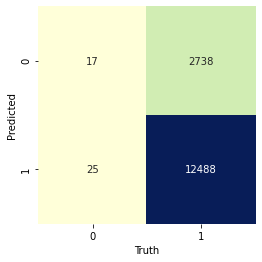

In [116]:
#from sklearn.metrics import accuracy_score, confusion_matrix
#cm_lgr1 = confusion_matrix(y_test,prediction) 
#names = np.unique(prediction)
#sns.heatmap(cm_lgr1, square=True, annot=True, cbar=False,xticklabels=names, yticklabels=names, cmap="YlGnBu" ,fmt='g')
#plt.xlabel('Truth')
#plt.ylabel('Predicted')

In [117]:
#accuracy_score = accuracy_score(y_test,prediction)
#print("Accuracy of  Logistic Regression :",accuracy_score)

Accuracy of  Logistic Regression : 0.819033272203301


# CALCULATING ACCURACY ON MANUAL FEATURES

As we already calculated the accuracy of model above,we will still calculate accuracy of the model on manual featuress which we extracted in the data cleaning part.
In this section we will test the model on 5 different MACHINE LEARNING MODELS to see whether the accuracy can be increased.

In [120]:
df_feat = df.drop(labels =['rating','title','review_text','branch','target','emails'], axis =1)

In [121]:
df_feat

,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails_count,urls_count
0,9,255,53,1354,4.298039,117,0,0,1,2,0,0
1,5,35,20,201,4.771429,13,0,0,2,0,0,0
2,1,228,12,1274,4.592105,103,0,0,2,6,0,0
3,2,55,10,286,4.218182,30,0,0,0,0,0,0
4,4,94,33,502,4.351064,45,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50899,6,359,24,2021,4.607242,134,0,1,2,8,0,3
50900,4,402,38,2423,4.992537,150,0,0,3,17,0,1
50901,5,182,34,935,4.142857,88,0,0,4,4,0,0
50902,4,231,28,1279,4.541126,105,0,0,2,1,0,0


In [122]:
y = df['target']

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer= clean_text)
text_counts = cv.fit_transform(df['review_text'])

In [128]:
text_counts.toarray().shape

(50904, 36)

In [130]:
df_bagow = pd.DataFrame(text_counts.toarray(),columns = cv.get_feature_names())

In [131]:
df_bagow

,0,1,2,3,4,5,6,7,8,9,...,q,r,s,t,u,v,w,x,y,z
0,0,0,2,0,0,0,0,0,0,0,...,0,39,28,40,16,7,10,1,5,0
1,0,0,0,0,1,2,0,0,0,0,...,0,9,5,2,3,2,2,1,0,0
2,1,0,0,2,0,0,0,0,0,0,...,0,30,25,42,14,12,5,1,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,7,7,12,4,1,1,0,1,0
4,2,1,0,1,0,0,0,0,0,0,...,0,10,12,10,5,1,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50899,2,2,0,2,0,2,1,0,0,1,...,1,64,50,68,23,11,10,2,6,0
50900,2,2,4,2,1,0,0,0,0,0,...,0,76,49,72,33,11,19,3,10,2
50901,3,1,4,0,0,1,2,0,0,0,...,1,28,20,29,19,3,3,0,4,0
50902,2,0,0,2,0,0,0,0,0,2,...,0,35,29,52,8,8,7,2,1,1


In [132]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [140]:
sgd = SGDClassifier(n_jobs=-1,random_state=42,max_iter=200)
lgr = LogisticRegression(random_state=42,max_iter=200)
lgrcv = LogisticRegressionCV(cv=10,random_state=42,max_iter=1000)
svm = LinearSVC(random_state=42,max_iter=200)
rfc = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=200)

In [141]:
clf = {'SGD':sgd, 'LGR':lgr, 'LGR-CV':lgrcv, 'SVM':svm, 'RFC':rfc}

In [142]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [143]:
def classify(X,y):
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, '---->', ac)

In [144]:
%%time
classify(df_bagow,y)

SGD ----> 0.8194676357921619
LGR ----> 0.8219231902563598
LGR-CV ----> 0.8218249680777919


C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM ----> 0.8224143011491994
RFC ----> 0.8231018563991749
Wall time: 51.6 s


In [146]:
df_feat.head()

,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,emails_count,urls_count
0,9,255,53,1354,4.298039,117,0,0,1,2,0,0
1,5,35,20,201,4.771429,13,0,0,2,0,0,0
2,1,228,12,1274,4.592105,103,0,0,2,6,0,0
3,2,55,10,286,4.218182,30,0,0,0,0,0,0
4,4,94,33,502,4.351064,45,0,0,0,9,0,0


In [147]:
%%time
classify(df_feat,y)

SGD ----> 0.8194676357921619
LGR ----> 0.8191729692564581
LGR-CV ----> 0.8194676357921619
SVM ----> 0.8187800805421864
RFC ----> 0.816815636970828
Wall time: 47.4 s


# MANUAL FEATURES + BAG OF WORDS

In [148]:
X = df_feat.join(df_bagow)

In [149]:
X

,wordcounts,wordcounts_reviewtext,charactercounts,charactercounts_reviewtext,average_wordlength,Stopwords,hastagscounts,mentions,numericcounts,uppercount,...,q,r,s,t,u,v,w,x,y,z
0,9,255,53,1354,4.298039,117,0,0,1,2,...,0,39,28,40,16,7,10,1,5,0
1,5,35,20,201,4.771429,13,0,0,2,0,...,0,9,5,2,3,2,2,1,0,0
2,1,228,12,1274,4.592105,103,0,0,2,6,...,0,30,25,42,14,12,5,1,3,0
3,2,55,10,286,4.218182,30,0,0,0,0,...,0,7,7,12,4,1,1,0,1,0
4,4,94,33,502,4.351064,45,0,0,0,9,...,0,10,12,10,5,1,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50899,6,359,24,2021,4.607242,134,0,1,2,8,...,1,64,50,68,23,11,10,2,6,0
50900,4,402,38,2423,4.992537,150,0,0,3,17,...,0,76,49,72,33,11,19,3,10,2
50901,5,182,34,935,4.142857,88,0,0,4,4,...,1,28,20,29,19,3,3,0,4,0
50902,4,231,28,1279,4.541126,105,0,0,2,1,...,0,35,29,52,8,8,7,2,1,1


In [150]:
%%time
classify(X,y)

SGD ----> 0.8194676357921619
LGR ----> 0.8227089676849032
LGR-CV ----> 0.8249680777919655


C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM ----> 0.82428052254199
RFC ----> 0.8213338571849523
Wall time: 2min 12s


# TF-IDF

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = clean_text)
X = tfidf.fit_transform(df['review_text'])

In [156]:
%%time
classify(pd.DataFrame(X.toarray()),y)

SGD ----> 0.8194676357921619
LGR ----> 0.8182889696493468
LGR-CV ----> 0.8184854140064827
SVM ----> 0.8189765248993223
RFC ----> 0.8197623023278656
Wall time: 44.3 s
